### EDA on Hyperglycemic patients

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import warnings

In [3]:
patient_df = pd.read_csv('../data/hyperglycemic_patients.csv')

#Print shape and data preview
print("Dataframe shape:   ", patient_df.shape)
print("Dataframe Features:", patient_df.columns)
patient_df.head()

Dataframe shape:    (14077, 17)
Dataframe Features: Index(['subject_id', 'stay_id', 'glucose_max', 'anchor_age', 'dod', 'gender',
       'dbp_mean', 'sbp_mean', 'glucose_mean', 'heart_rate_mean', 'spo2_mean',
       'resp_rate_mean', 'temperature_mean', 'apsiii', 'glucose_score', 'los',
       'avg_bmi_value'],
      dtype='object')


,subject_id,stay_id,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value
0,12041046,31249096,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000
1,17421995,38100564,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,36.727586,87,5,4.472905,30.558477
2,10352416,35043893,531.0,23,1,0,64.169118,119.661765,275.352941,154.028986,83.698413,25.584615,39.725000,158,5,11.636042,30.558477
3,16924291,34261137,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477
4,15705944,37056020,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,33.590000,150,5,17.513646,30.558477


Min value: 0.0169791666666666 
Max value:  86.31248842592593


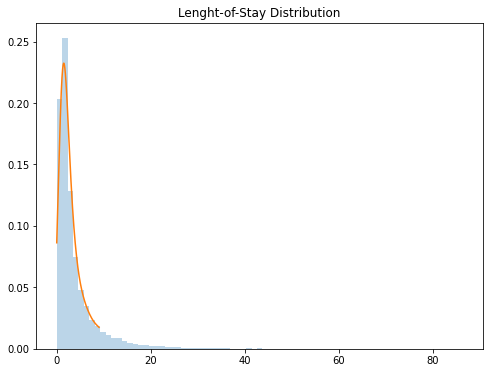

In [20]:
# patient_df.los.plot(kind='hist', bins=60)
print("Min value:", min(patient_df.los), "\nMax value: ", max(patient_df.los))


kde = stats.gaussian_kde(patient_df.los)
X_discrete = np.linspace(0, 9, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df.los, density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("Lenght-of-Stay Distribution")
plt.show()

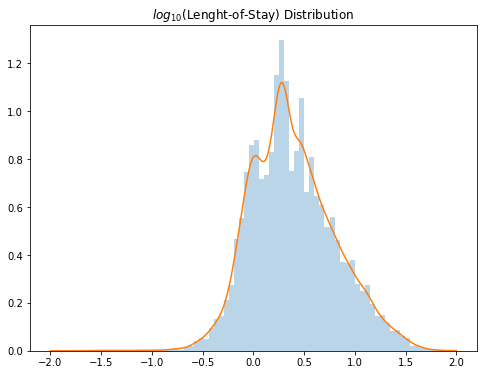

In [28]:
patient_df['log10_los'] = np.log10(patient_df.los)

kde = stats.gaussian_kde(patient_df['log10_los'])
X_discrete = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df['log10_los'], density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("$log_{10}$(Lenght-of-Stay) Distribution")
plt.show()